# Exploratory plotting

In [1]:
import pandas as pd
from plotnine import *

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
res_df = pd.read_csv('reservoir.csv')

# rain data is from here: https://www.weather.gov/wrh/Climate?wfo=mtr
# T = Trace, barely enough to be quantifiable. Replacing with 0
rain_df = pd.read_csv('rainfall_raw.csv', na_values='T')
rain_df = rain_df.fillna(0)
# also export this new cleaned rainfall csv for plotting later
rain_df.to_csv('rainfall.csv', index=False)

creeks_df = pd.read_csv('creeks.csv')
creek_above85_df = pd.read_csv('creek_above85.csv')
creek_above_res_df = pd.read_csv('creek_above_reservoir.csv')
creek_below_res_df = pd.read_csv('creek_below_reservoir.csv')

In [3]:
# convert to datetime
res_df.DateTime = pd.to_datetime(res_df.DateTime)
rain_df.Date = pd.to_datetime(rain_df.Date)

creeks_df.DateTime = pd.to_datetime(creeks_df.DateTime)
creek_above85_df.DateTime = pd.to_datetime(creek_above85_df.DateTime)
creek_above_res_df.DateTime = pd.to_datetime(creek_above_res_df.DateTime)
creek_below_res_df.DateTime = pd.to_datetime(creek_below_res_df.DateTime)

### Charts to use

<AxesSubplot:xlabel='DateTime'>

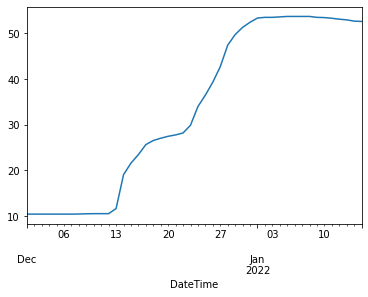

In [4]:
# Reservoir chart > Will use this idea
res_df.resample('D', on='DateTime').Capacity.mean().plot()

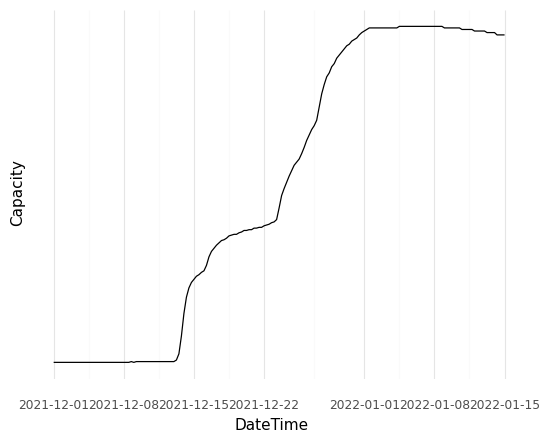

<ggplot: (315772615)>

In [5]:
# Reservoir chart, but in ggplot
(ggplot(res_df, aes(x='DateTime', y='Capacity')) +
 geom_line() +
 scale_y_continuous(breaks=range(0, 7)) +
 theme_minimal()
)

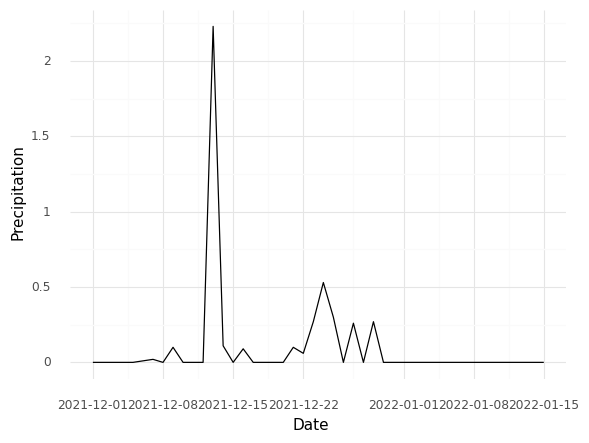

<ggplot: (315777244)>

In [6]:
# Rainfall chart
(ggplot(rain_df, aes(x='Date', y='Precipitation')) +
 geom_line() +
 theme_minimal()
)

### Charts not to use

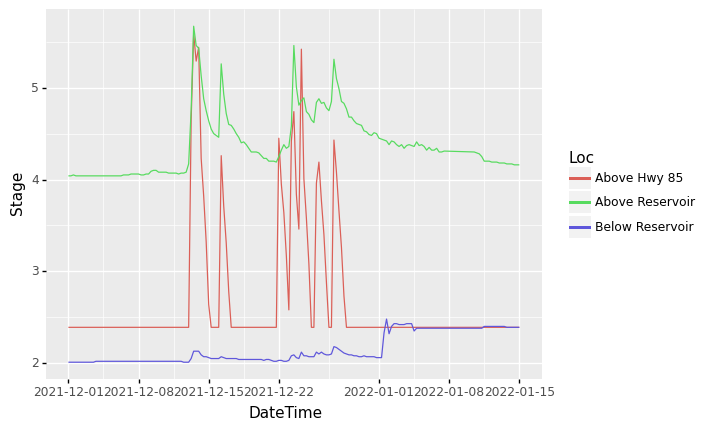

<ggplot: (315772456)>

In [7]:
# All creeks
(ggplot(creeks_df, aes(x='DateTime', y='Stage', color='Loc')) +
 geom_line()
)

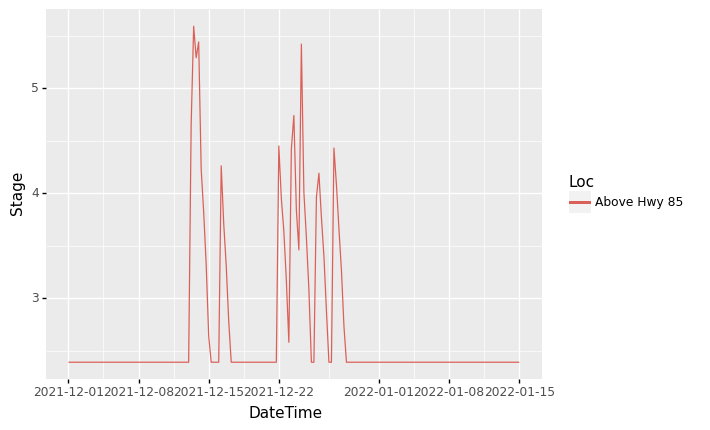

<ggplot: (315877108)>

In [8]:
# Creek above Hwy 85
(ggplot() +
 geom_line(creek_above85_df, aes(x='DateTime', y='Stage', color='Loc'))
)

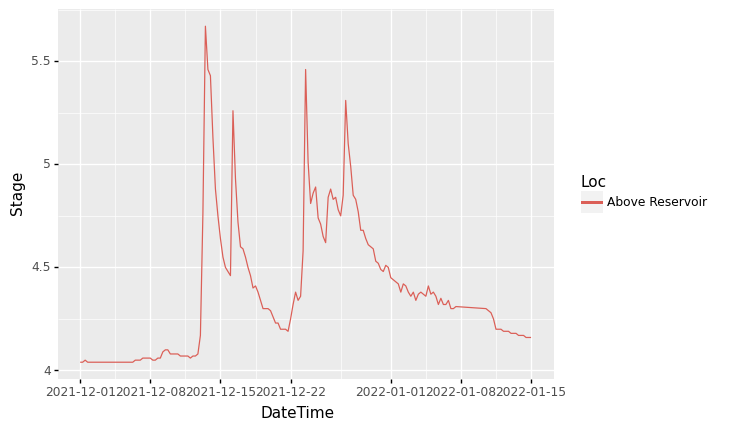

<ggplot: (315734486)>

In [9]:
# Creek above reservoir
(ggplot() +
 geom_line(creek_above_res_df, aes(x='DateTime', y='Stage', color='Loc'))
)

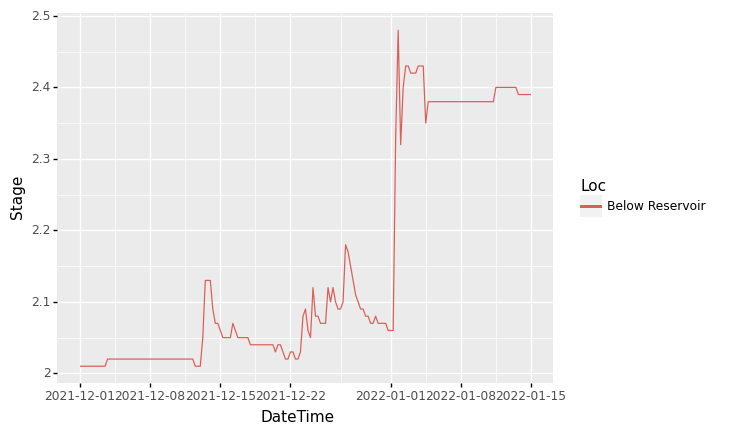

<ggplot: (315772597)>

In [10]:
# Creek below reservoir
(ggplot() +
 geom_line(creek_below_res_df, aes(x='DateTime', y='Stage', color='Loc'))
)